In [ ]:
from skimage import io, feature
import matplotlib.pyplot as plt

c:\Users\yanyi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [15]:
img_path = r'AIGC-Detection-Dataset\AIGC-Detection-Dataset\train\0_real\000000000562.jpg'

c:\Users\yanyi\anaconda3\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


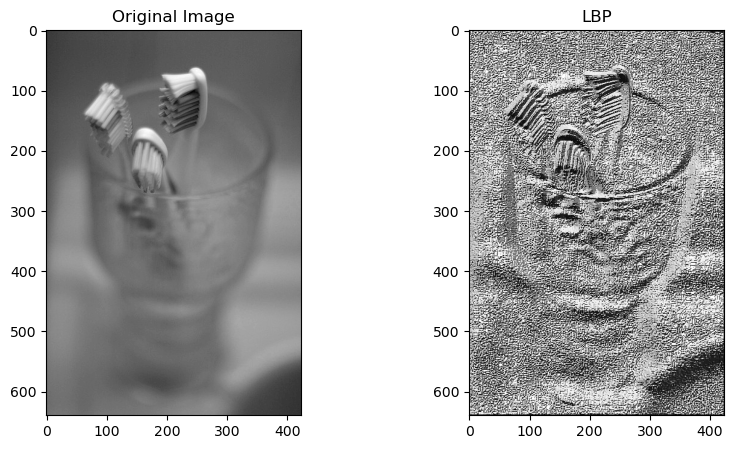

In [16]:
# Load the image
image = io.imread(img_path, as_gray=True)

# Apply Local Binary Pattern (LBP)
lbp = feature.local_binary_pattern(image, P=8, R=1)

# Display the original image and the LBP result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('LBP')
plt.imshow(lbp, cmap='gray')
plt.show()

In [7]:
import numpy as np
import cv2

In [8]:
def extract_texture_features(image):
    gabor_kernels = []
    for theta in np.arange(0, np.pi, np.pi / 4):
        kernel = cv2.getGaborKernel((9, 9), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        gabor_kernels.append(kernel)
    filters = [cv2.filter2D(image, cv2.CV_8UC3, kernel) for kernel in gabor_kernels]
    return np.stack(filters, axis=0)

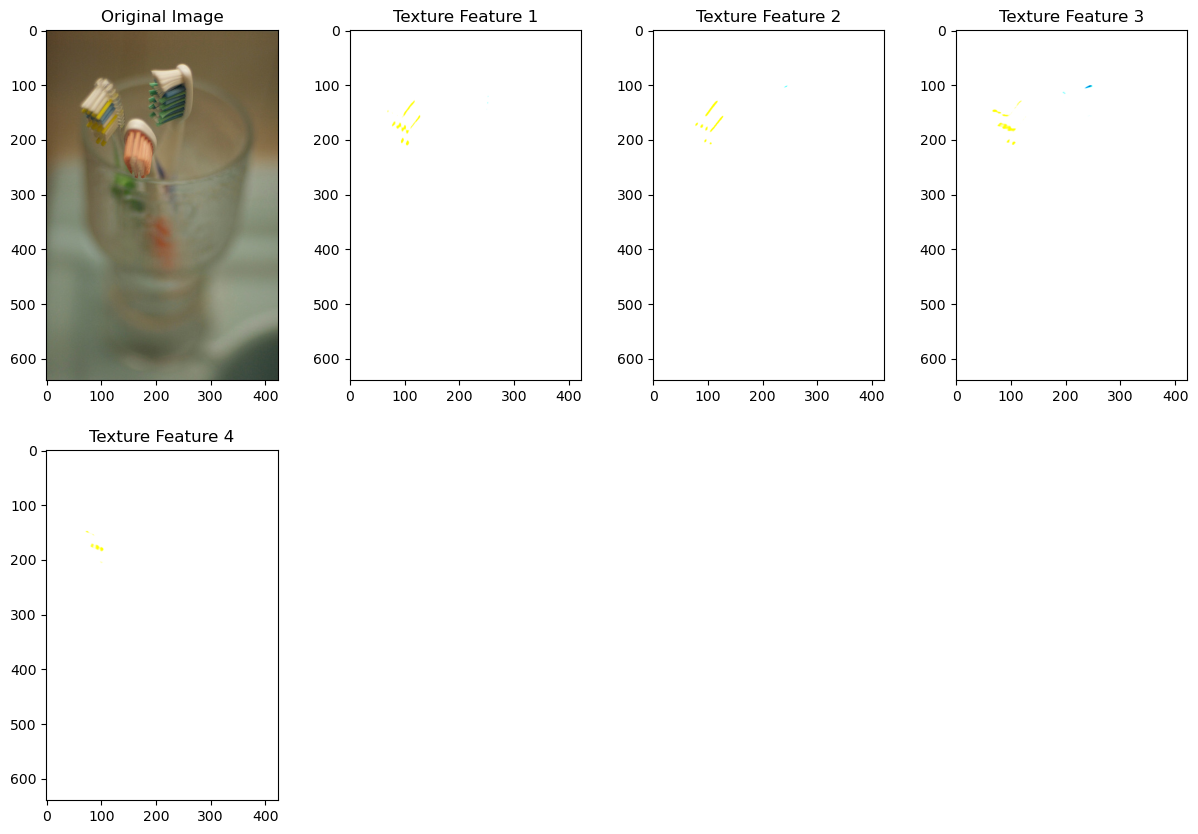

In [14]:
# Extract texture features using the defined function
new_img = io.imread(r'AIGC-Detection-Dataset\AIGC-Detection-Dataset\train\0_real\000000000562.jpg')

texture_features = extract_texture_features(new_img)

# Display the original image and the texture features
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(new_img)

for i in range(texture_features.shape[0]):
    plt.subplot(2, 4, i + 2)
    plt.title(f'Texture Feature {i + 1}')
    plt.imshow(texture_features[i], cmap='gray')

plt.show()